In [3]:
import pandas as pd
data = pd.read_csv('GOOGL.csv',parse_dates = True,index_col = 'Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
data = data[['Open','High','Low','Close','Adj Close','Volume']]

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [6]:
data['hl_pct'] = (data['High']-data['Low'])/data['Low'] *100
data['oc_pct']= (data['Close']-data['Open'])/data['Open'] * 100

In [7]:
data = data[['Close','hl_pct','oc_pct', 'Volume']]
data.head()

,Close,hl_pct,oc_pct,Volume
Date,,,,
2004-08-19,50.220219,8.441017,0.340000,44659096
2004-08-20,54.209209,8.537317,7.227004,22834343
2004-08-23,54.754753,4.062364,-1.218966,18256126
2004-08-24,52.487488,7.753212,-5.726354,15247337
2004-08-25,53.053055,3.966113,0.990858,9188602


In [8]:
forecast_col = 'Close'
data.fillna(-99999,inplace= True)
import math
forecast_out = int(math.ceil(0.001*len(data)));
data['label'] = data[forecast_col].shift(-forecast_out)
data.tail()

,Close,hl_pct,oc_pct,Volume,label
Date,,,,,
2022-03-18,2722.510010,3.013416,2.024367,2223100,NaN
2022-03-21,2722.030029,2.205563,-0.045533,1341600,NaN
2022-03-22,2797.360107,3.635888,2.767423,1774800,NaN
2022-03-23,2765.510010,1.272176,-0.307855,1257700,NaN
2022-03-24,2831.439941,2.808334,1.704021,1317900,NaN


In [9]:
import numpy as np
from sklearn import preprocessing ,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
x = np.array(data.drop(['label'],1))
x= preprocessing.scale(x)
x_lately = x[-forecast_out:]
x=x[:-forecast_out]
data.dropna(inplace=True)
y= np.array(data['label'])
print(len(y),len(y))

4426 4426


/tmp/ipykernel_25787/1360889052.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop(['label'],1))


In [11]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
clf= LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [13]:
accuracy = clf.score(x_test,y_test)
accuracy

0.9970780458694961

In [14]:
forecast_set = clf.predict(x_lately)

In [15]:
import matplotlib.pyplot as plt
import datetime
from matplotlib import style

In [16]:
style.use('ggplot')

In [17]:
data['Forecast'] = np.nan
last_date = data.iloc[-1].name
last_unix= last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(data.iloc[-1].name,datetime.datetime.fromtimestamp(next_unix))

2022-03-17 00:00:00 2022-03-18 05:45:00


In [18]:
for i in forecast_set :
    next_date = datetime.datetime.fromtimestamp(next_unix);
    next_unix +=one_day
    data.loc[next_date]= [np.nan for _ in range(len(data.columns)-1)]+[i]

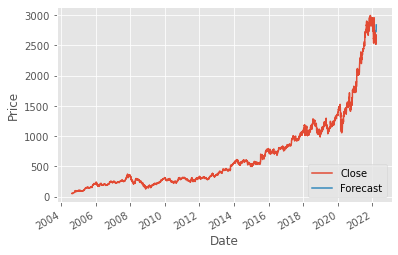

In [19]:
data['Close'].plot()
data['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
print(data.tail(10),data.head())

                           Close    hl_pct    oc_pct     Volume        label  \
Date                                                                           
2022-03-11 00:00:00  2597.409912  3.212183 -2.710350  1572700.0  2722.510010   
2022-03-14 00:00:00  2519.020020  4.098181 -3.300575  1940600.0  2722.030029   
2022-03-15 00:00:00  2583.959961  3.288254  1.749935  1546000.0  2797.360107   
2022-03-16 00:00:00  2665.610107  3.572079  1.948636  1778800.0  2765.510010   
2022-03-17 00:00:00  2676.780029  1.433981  0.518218  1413200.0  2831.439941   
2022-03-18 05:45:00          NaN       NaN       NaN        NaN          NaN   
2022-03-19 05:45:00          NaN       NaN       NaN        NaN          NaN   
2022-03-20 05:45:00          NaN       NaN       NaN        NaN          NaN   
2022-03-21 05:45:00          NaN       NaN       NaN        NaN          NaN   
2022-03-22 05:45:00          NaN       NaN       NaN        NaN          NaN   

                        Forecast  
Date

In [23]:
import joblib
joblib.dump(clf,'GoogleStocks.pickle')

['GoogleStocks.pickle']